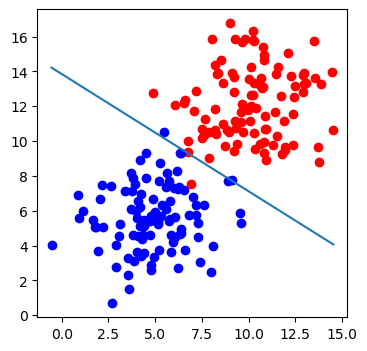

matrix([[0.04855932]])

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# draw a line with two points
def draw(x1, x2):
    line = plt.plot(x1, x2)
    plt.pause(0.0001)
    line[0].remove()

# sigmoid function to compute probabilities instead of district activation function
def sigmoid(score):
    return 1 / (1 + np.exp(-score))

# calculate error of points according to the given line parameters
def calculate_error(line_parameters, points, y):
    # number of points
    m = points.shape[0]
    # run the sigmoid function on the points given to the line parameters
    p = sigmoid(points * line_parameters)
    # declaring cross entropy for average error
    cross_entropy = -(1/m) * (np.log(p).T * y + np.log(1 - p).T * (1-y))
    return cross_entropy

# decreasing the error step by step using gradient descent
# alpha: learning rate    it: number of iterations
def gradient_descent(line_parameters, points, y, alpha, it):
    # number of points
    m = points.shape[0]
    # descent iteration amount
    for _ in range(it):
        # run the sigmoid function on the points given to the line parameters
        p = sigmoid(points * line_parameters)
        # calculate the gradient of points
        gradient = (points.T * (p - y)) * (1/m) * alpha
        # descend the gradient from parameters to decrease the error
        line_parameters -= gradient
        # declare the calculated line parameters
        w1 = line_parameters.item(0)
        w2 = line_parameters.item(1)
        b = line_parameters.item(2)
        # find the furthest points of each region to draw the initial approximate line
        x1 = np.array([points[:, 0].max(), points[:, 0].min()])
        # w1x1 + w2x2 + b = 0
        x2 = -b / w2 + x1 * (-w1 / w2)
    # draw the linear regression line to classify points
    draw(x1, x2)

# number of points
n_pts = 100
# using np.random.seed(i), we choose a static seed of random numbers, so we can test our program easier
np.random.seed(0)
# create the bias array
bias = np.ones(n_pts)
# create the top and bottom random points for our model
# np.random.normal(mean, sd, number)
# we need the transpose of generated random array to put the x1, x2 and bias values in a row
# shape of regions before transpose: (n, 3)    after transpose: (3, n)
top_region = np.array([np.random.normal(10, 2, n_pts), np.random.normal(12, 2, n_pts), bias]).T
bottom_region = np.array([np.random.normal(5, 2, n_pts), np.random.normal(6, 2, n_pts), bias]).T
# merge regions in a single array
all_points = np.vstack((top_region, bottom_region))
# declare the matrix of line's paremeters in order to be able to multiply and use matrix properties
line_parameters = np.matrix(np.zeros(3)).T
# declare the label array for calculating total error. blue points are labeld as 1, red ones are 0
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

# create a subplot ax in size 4x4 in order to display each region
_, ax = plt.subplots(figsize=(4, 4))
# scatter the points using ax
# region[:, 0]: x axis of random generated numbers, that is x1 values
# region[:, 1]: y axis of random generated numbers, that is x2 values
ax.scatter(top_region[:, 0], top_region[:, 1], color='r')
ax.scatter(bottom_region[:, 0], bottom_region[:, 1], color='b')
# run the gradient descent on the parameters and draw the final achieved line
gradient_descent(line_parameters, all_points, y, 0.05, 50000)
# display the plot
plt.show()

calculate_error(line_parameters, all_points, y)

